In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
from scipy.stats import norm
import seaborn as sns
sns.set(context = 'paper', palette = 'winter_r', style = 'darkgrid', 
        rc= {'figure.facecolor': 'gray',}, font_scale=1.5)

In [3]:
def Readcsv(data):
    return (pd.read_csv(data,index_col = 'PassengerId'))

traindf = Readcsv('train.csv') 
traindf.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
traindf.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

## <center>Visualization</center>

/Users/libaisun/virtual/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


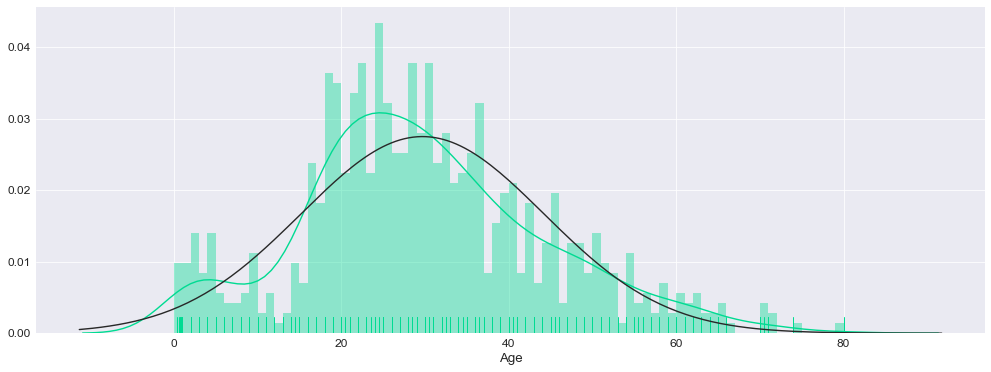

In [7]:
plt.figure(figsize = [17,6])
# sns.displot: 直方图 + 正态分布拟合 + 拟合线
a = sns.distplot(traindf['Age'].dropna(),bins = range(0,81,1), rug = True, fit = norm)

- **小提琴🎻图**<br>
与直方图（表达均值）相比，表达了值的分布

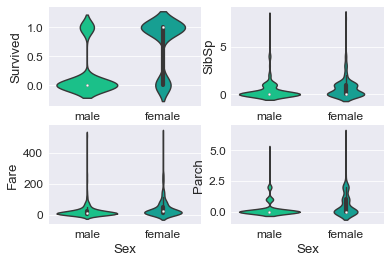

In [9]:
f, ax = plt.subplots(2, 2)
# 和pyplot不一样，ax是写在里边的
sns.violinplot(x = 'Sex', y = 'Survived', data = traindf,ax = ax[0,0])
sns.violinplot(x = 'Sex', y = 'Fare', data = traindf,ax = ax[1,0])
sns.violinplot(x = 'Sex', y ='SibSp',data = traindf,ax = ax[0,1])
sns.violinplot(x = 'Sex', y = 'Parch', data = traindf, ax = ax[1,1])

- **多条件·直方图📊**

- Show point estimates and confidence intervals as rectangular bars.

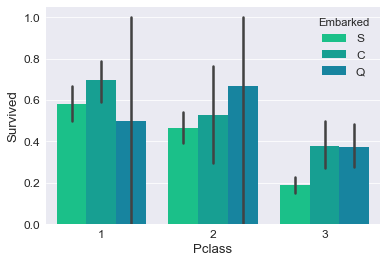

In [29]:
sns.barplot(x = 'Pclass',y ='Survived',data = traindf,hue = 'Embarked')

/Users/libaisun/virtual/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/libaisun/virtual/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


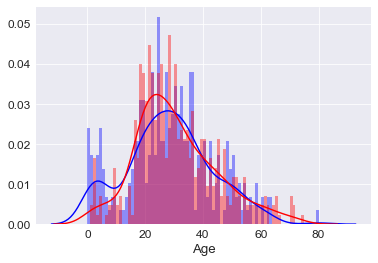

In [33]:
sns.distplot(traindf[traindf['Survived']==1]['Age'].dropna(),norm_hist = True,
             bins = np.arange(0,81,1),color = 'blue',label='Survived')
sns.distplot(traindf[traindf['Survived']==0]['Age'].dropna(),norm_hist = True,
             bins = np.arange(0,81,1), color = 'red',label='Not Survived')

### factorplot: 多因素plot

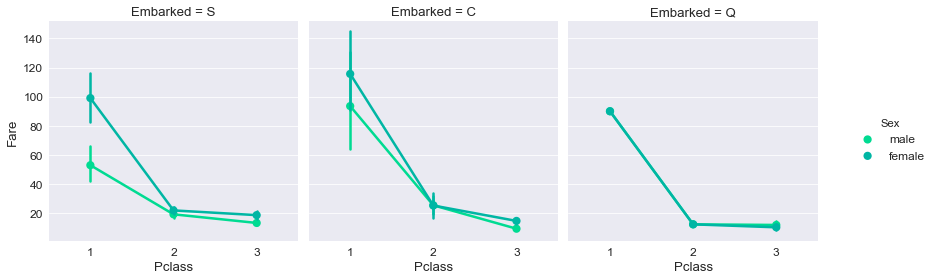

In [34]:
sns.factorplot(x = 'Pclass', y = 'Fare', col = 'Embarked', hue = 'Sex', 
               data = traindf, margin_titles = True)

## <center>Modeling</center>

In [35]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier, plot_importance 

In [39]:
df = pd.read_csv('data_for_ensemble_model.csv',index_col=0)
df = df.set_index('PassengerId')
df.head()

,Survived,SibSp,Parch,Cabin_No,Cabin_Yes,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,...,Pclass_2,Pclass_3,Sex_Pclass_female_1,Sex_Pclass_female_2,Sex_Pclass_female_3,Sex_Pclass_male_1,Sex_Pclass_male_2,Sex_Pclass_male_3,Age_scaled,Fare_scaled
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,0,1,0,1,0,0,0,1,0,1,...,0,1,0,0,0,0,0,1,-0.561380,-0.502445
2,1,1,0,0,1,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0.613171,0.786845
3,1,0,0,1,0,0,0,1,1,0,...,0,1,0,0,1,0,0,0,-0.267742,-0.488854
4,1,1,0,0,1,0,0,1,1,0,...,0,0,1,0,0,0,0,0,0.392942,0.420730
5,0,0,0,1,0,0,0,1,0,1,...,0,1,0,0,0,0,0,1,0.392942,-0.486337


In [52]:
y = df.iloc[:,0]
X = df.iloc[:,1::]

In [53]:
npX = np.array(X).copy()
npy = np.array(y).copy()

In [54]:
clf_rf = RandomForestClassifier()
clf_et = ExtraTreesClassifier()
# either by voting or by averaging
# default classifier: decision tree
clf_bc = BaggingClassifier()
clf_ada = AdaBoostClassifier()
clf_dt = DecisionTreeClassifier()
clf_xg = XGBClassifier()
clf_lr = LogisticRegression()
clf_svm = SVC()

In [57]:
import warnings 
warnings.filterwarnings("ignore")

Classifiers = ['RandomForest','ExtraTrees','Bagging','AdaBoost','DecisionTree','XGBoost','LogisticRegression','SVM']
scores = []
models = [clf_rf, clf_et, clf_bc, clf_ada, clf_dt, clf_xg, clf_lr, clf_svm]
for model in models:
    score = cross_val_score(model, npX, npy, scoring = 'accuracy', cv = 10, n_jobs = -1).mean()
    scores.append(score)

In [58]:
mode = pd.DataFrame(scores, index = Classifiers, columns = ['score']).sort_values(by = 'score',
             ascending = False)
mode

,score
XGBoost,0.820495
SVM,0.820407
AdaBoost,0.817174
LogisticRegression,0.812617
Bagging,0.808224
RandomForest,0.803653
ExtraTrees,0.802567
DecisionTree,0.779060


- **SVM**
- https://blog.csdn.net/lujiandong1/article/details/46386201
- define 距离函数 f(x1, x2) 为: $$sqrt( x1^2 + x2 ^ 2 )$$ 然后让 f(x1，x2) 投影到 x3. 那么对于SVM来说，我们的 f 就是内核函数
- gamma的作用，其实就是控制数据在向高维度投影后的缩放比例。如果 gamma 很大，那么上图的点就会离切面很远。如果 gamma 很小，上图的点就会离切面很近。而这个缩放比例就会影响线性分割面的运算结果（不同的loss function对距离的惩罚度不一样）。这也是SVM对数据 Scaling 和 Normalization 是敏感的原因之一。因为最后都是算的一个 Linear Model. 这就是为什么，有人说如果原始数据比较分散，gamma可以小一点。反之，如果原始数据很密集，gamma可以大一点。当然，这不是绝对的，所以我们才要做 GridSearch
- 原来在二维空间中一个线性不可分的问题，映射到四维空间后，变成了线性可分的！因此这也形成了我们最初想解决线性不可分问题的基本思路——向高维空间转化，使其变得**线性可分**。
- 由于计算的是**内积**，我们可以想到IR中的**余弦相似度**，如果x和z向量夹角越小，那么核函数值越大，反之，越小。

- **径向基函数——Radial Basis Function（RBF）**
- 所谓径向基函数 (Radial Basis Function 简称 RBF), 就是某种沿径向对称的**标量函数**。 通常定义为空间中任一点x到某一中心xc之间**欧氏距离的单调函数** ,可记作 k(||x-xc||), 其作用往往是局部的 , 即当x远离xc时函数取值很小。
- 最常用的径向基函数是**高斯核函数** ,形式为 k(||x-xc||)=$$k(x, x') = e^{-\frac{||x - x'||^2}{2\sigma^2}}$$ 其中$x_c$为核函数中心,$σ$为函数的宽度参数 , 控制了函数的径向作用范围。如果x和$x_c$很相近那么核函数值为1（$e^0 = 1$），如果x和$x_c$相差很大那么核函数值约等于0。由于这个函数类似于高斯分布，因此称为高斯核函数，也叫做径向基函数(Radial Basis Function 简称RBF)。它能够把原始特征映射到**无穷维**。




https://blog.csdn.net/wuyanxue/article/details/79642758

## 高斯核将数据映射到高维甚至无穷维的原理

<img src = 'https://pic1.zhimg.com/bfa7b22bf398f7520b42b9674d342f50_b.png'>

#### 核函数有很多种，如线性核、多项式核、Sigmoid 核和 RBF（Radial Basis function）核

建议首选RBF核函数进行高维投影，因为：

- 能够实现非线性映射；（ 线性核函数可以证明是他的一个特例；SIGMOID核函数在某些参数上近似RBF的功能。）
- 参数的数量影响模型的复杂程度，多项式核函数参数较多。
- the RBF kernel has less numerical difficulties.


https://blog.csdn.net/huang1024rui/article/details/51510611

核函数的必要条件：

K是有效的核函数 ==> 核函数矩阵K是对称半正定的。

可幸的是，这个条件也是充分的，由Mercer定理来表达。 

Mercer定理表明为了证明K是有效的核函数，那么我们不用去寻找函数表达式，而只需要在训练集上求出各个$K_{ij}$，然后判断矩阵K是否是半正定（使用左上角主子式大于等于零等方法）即可。

许多其他的教科书在Mercer定理证明过程中使用了L2范数和再生希尔伯特空间等概念，但在特征是n维的情况下，这里给出的证明是等价的。

In [59]:
parameters_xg = {'max_depth':[3,6,7], 'learning_rate': [0.1,0.2], 'n_estimators': [300,200], 
                 'min_child_weight': [4], 'reg_alpha': [6,0], 'reg_lambda': [1,8],'max_delta_step':[2],
                 'gamma':[0],'seed':[1]}

# Radial Basis Function (RBF)
# 径向基核函数
parameters_svm = {'C':[0.9,0.01],'kernel':['rbf','linear'], 'gamma':[0,0.1,'auto'], 'probability':[True,False],
                  'random_state':[0,7,16],'decision_function_shape':['ovo','ovr'],'degree':[3,4,10]}

parameters_rf = {'n_estimators': [100,50], 'max_features': [7,'auto',None],
                 'n_jobs': [-1], 'min_samples_leaf': [2,4,], 'random_state':[1,7,], 
                 'min_samples_split':[2,6,], 'oob_score': [True,False],
                 'criterion': ['gini'], 'warm_start': [True,False]}

In [61]:
def grid(model,parameters):
    grid = GridSearchCV(estimator = model, param_grid = parameters, cv = 10, 
                        scoring = 'accuracy')
    grid.fit(npX,npy)
    return grid.best_score_, grid.best_estimator_.get_params()

向model传入**一个**参数

In [62]:
def imp_features(model, model_name, params):
    # 向model传入**一个**参数
    Model = model(**params)
    Model.fit(npX,npy)
    names = X.columns
    feature = Model.feature_importances_
    important_features = pd.Series(data = feature, index = names,)
    important_features = important_features.sort_values(ascending = True)
    return important_features.plot(kind = 'barh', grid = False,title = model_name)

0.8395061728395061


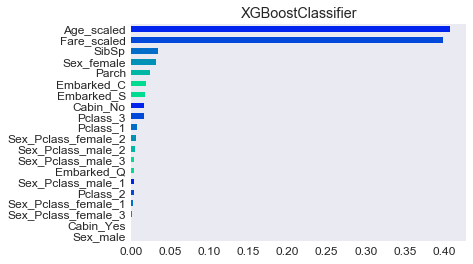

In [63]:
best_score_xg, best_params_xg = grid(clf_xg,parameters_xg)
print(best_score_xg)
imp_features(XGBClassifier, 'XGBoostClassifier', best_params_xg)

0.8327721661054994


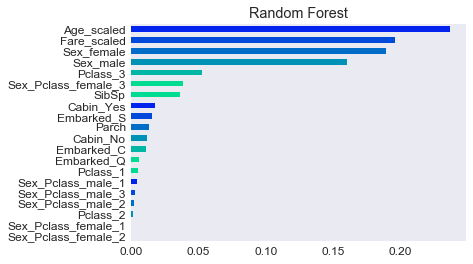

In [64]:
best_score_rf, best_params_rf = grid(clf_rf, parameters_rf)
print(best_score_rf)
imp_features(RandomForestClassifier,'Random Forest', best_params_rf)

In [65]:
best_score_svm, best_params_svm = grid(clf_svm, parameters_svm)
print(best_score_svm)
print(best_params_svm)

0.8249158249158249
{'C': 0.9, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovo', 'degree': 3, 'gamma': 0.1, 'kernel': 'rbf', 'max_iter': -1, 'probability': True, 'random_state': 0, 'shrinking': True, 'tol': 0.001, 'verbose': False}


- Let us visualize the decision boundaries to see if our models are overfitting or not 
- but the number of features in our data set are 7+ we'll have to reduce the dimensions to 2 to be able to visualize, in this notebook PCA is used for dimensionality reduction.

## <center>Decision Boundary Visualization</center>

等高线<br>
contour() and contourf() **draw contour lines and filled contours**, respectively. Except as noted, function signatures and return values are the same for both versions.

In [66]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap

# 一定要标准化哦，不然会受到量纲的影响
x = StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = .2)
X_train_reduced = PCA(n_components = 2).fit_transform(X_train)
X_test_reduced  = PCA(n_components=  2).fit_transform(X_test)

In [68]:
def boundaries(model, heading, best_params):
    Model = model(**best_params)
    Model.fit(X_train_reduced, y_train)

    X_set, y_set = np.concatenate([X_train_reduced, X_test_reduced], axis = 0), np.concatenate([y_train, y_test], axis = 0)
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01), np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

    #plt.figure(figsize = [15,16])
    plt.contourf(X1, X2, Model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                     alpha = 0.5, cmap = ListedColormap(('k', 'blue')))
    
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())

    for i, j in enumerate(np.unique(y_set)):
        # j：y_set的值
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
    plt.xticks(fontsize = 3)
    plt.yticks(fontsize = 3)

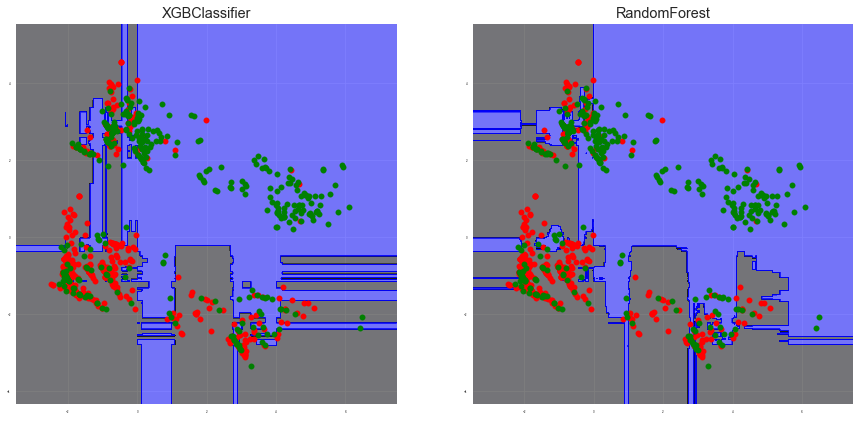

In [69]:
fig = plt.figure(figsize=[15,7])

ax = plt.subplot(1,2,1)
plt.title('XGBClassifier')
boundaries(XGBClassifier,'eXtreme Boosting Classifier', best_params_xg)


ax = plt.subplot(1,2,2)
plt.title('RandomForest')
boundaries(RandomForestClassifier, 'Random Forest', best_params_rf)
# XGBoost的score更高

The graphs above clearly shows that the models are overfitting quite a bit, hence their performance will be bad on the test set. Let's look at our **SVM model's decision boundaries** with **mlxtend library**.

Text(0.5,1,'Support Vector Machines')

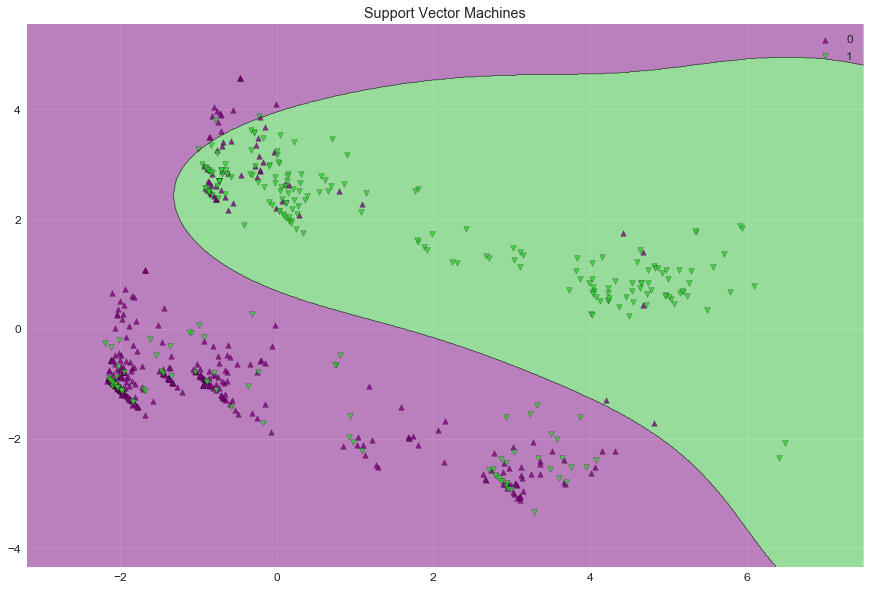

In [71]:
from mlxtend.plotting import plot_decision_regions
t = np.array(y_train)
t = t.astype(np.integer)
clf_svm = SVC(**best_params_svm)
clf_svm.fit(X_train_reduced,t)
plt.figure(figsize = [15,10])
plot_decision_regions(X_train_reduced, t, clf = clf_svm, hide_spines = False, colors = 'purple,limegreen',
                      markers = ['^','v'])
plt.title('Support Vector Machines')

然后，综合正确率&过拟合综合考虑，选取函model，提交预测。

## <center>SVM

https://blog.csdn.net/v_july_v/article/details/7624837

- 分类标准的起源：Logistic回归
- gamma: 函数间隔：functional margin
- 目标函数是二次的，约束条件是线性的，所以它是一个凸二次规划问题。这个问题可以用现成的QP (Quadratic Programming) 优化包进行求解。一言以蔽之：在一定的约束条件下，目标最优，损失最小。
-  此外，由于这个问题的特殊结构，还可以通过拉格朗日对偶性（Lagrange Duality）变换到对偶变量 (dual variable) 的优化问题，即通过求解与原问题等价的对偶问题（dual problem）得到原始问题的最优解，这就是线性可分条件下支持向量机的对偶算法，这样做的优点在于：一者对偶问题往往更容易求解；二者可以自然的引入核函数，进而推广到非线性分类问题
- 通过拉格朗日函数将约束条件融合到目标函数里去，从而只用一个函数表达式便能清楚的表达出我们的问题
- 也就是说，原始问题通过满足KKT条件，已经转化成了对偶问题。而求解这个对偶学习问题，分为3个步骤：首先要让L(w，b，a) 关于 w 和 b 最小化，然后求对的极大，最后利用SMO算法求解对偶问题中的拉格朗日乘子。

- ϕ：X->F是从输入空间到某个特征空间的映射，这意味着建立非线性学习器分为两步：

1. 首先使用一个非线性映射将数据变换到一个特征空间F，<br>
2. 然后在特征空间使用线性学习器分类。<br>
- 如果有一种方式可以在特征空间中直接计算内积〈φ(xi · φ(x)〉，就像在原始输入点的函数中一样，就有可能将两个步骤融合到一起建立一个非线性的学习器，这样直接计算法的方法称为核函数方法：
- φ是从X到内积特征空间F的映射。

$〈φ(x_1) · φ(x_2)〉$  之后的内积的结果是相等的，那么区别在于什么地方呢？<br>

- 一个是映射到高维空间中，然后再根据内积的公式进行计算；
- 而另一个则直接在原来的低维空间中进行计算，而**不需要显式地写出映射后的结果**。
- 在前一种方法已经无法计算的情况下，后一种方法却依旧能从容处理，甚至是无穷维度的情况也没有问题。

<img src = 'https://upload-images.jianshu.io/upload_images/1825662-f3e1578480e170a7.png'>

- C: 用于控制松弛向量
- SVM它本质上即是一个分类方法，用$w^T+b$定义分类函数，于是求w、b，为寻最大间隔，引出$1/2||w||^2$，继而引入拉格朗日因子，化为对拉格朗日乘子a的求解（求解过程中会涉及到一系列最优化或凸二次规划等问题），如此，求w.b与求a等价，而a的求解可以用一种快速学习算法SMO，
- 至于核函数，是为处理非线性情况，若直接映射到高维计算恐维度爆炸，故在低维计算，等效高维表现。

<img src='https://upload-images.jianshu.io/upload_images/1825662-7a693160a3d0cd94.png'>